In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
#File directories
sub_basin = "Seymour"

#Flight dates formatted for legend
Metro_dates = "P01: March 13 2021", "P02: April 5 2021", "P03: April 20 2021", "P04: May 15 2021", "P05: June 21 2021"
Cruickshank_dates = "P01: March 11 2021", "P02: April 5 2021", "P03: April 20 2021", "P04: May 15 2021", "P05: June 21 2021"
Van_title = "SWE by Elevation \n Seymour watershed"
title = "SWE by Elevation \n" + wshed + " watershed: " + sub_basin
display(wshed)

C:\Users\BISHOPA\AppData\Local\Temp\ipykernel_20488\762669704.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([p1,p2,p3,p4,p5], labels=(x_labels_dates), loc="upper left", fontsize = "medium")


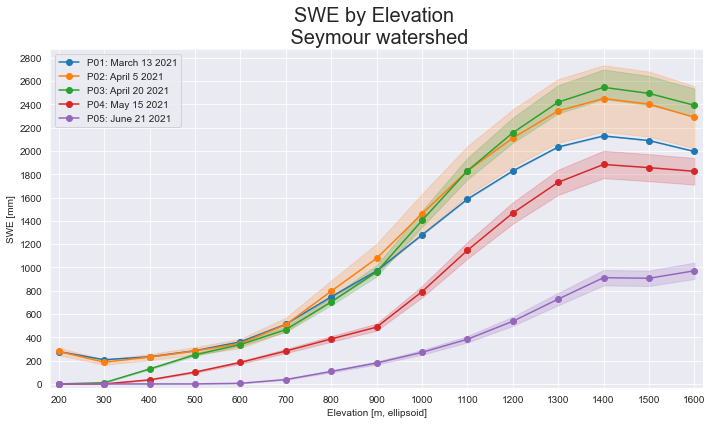

In [61]:
def swe_elevation_plots(file_path, file, wshed, sub_basin, x_labels_dates,title,step):
    os.chdir(file_path)
    #set graph parameters
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10,6))
    fig.set_tight_layout(True)
    color_list = sns.color_palette()[:5]
    
    #read in csv
    df = pd.read_csv(file + ".csv")
    
    #variables per each phase
    p01 = df[df["Phase"]==1]
    p02 = df[df["Phase"]==2]
    p03 = df[df["Phase"]==3]
    p04 = df[df["Phase"]==4]
    p05 = df[df["Phase"]==5]
    
    p1 = ax.plot(p01["zbin"], p01["swe_mm"], "-o", color=color_list[0])
    p2 = ax.plot(p02["zbin"], p02["swe_mm"], "-o", color=color_list[1])
    p3 = ax.plot(p03["zbin"], p03["swe_mm"], "-o", color=color_list[2])
    p4 = ax.plot(p04["zbin"], p04["swe_mm"], "-o", color=color_list[3])
    p5 = ax.plot(p05["zbin"], p05["swe_mm"], "-o", color=color_list[4])
    
    ax.fill_between(p01["zbin"], p01["swe_lm"],p01["swe_hm"], alpha=0.2, color = color_list[0])
    ax.fill_between(p02["zbin"], p02["swe_lm"],p02["swe_hm"], alpha=0.2, color = color_list[1])
    ax.fill_between(p03["zbin"], p03["swe_lm"],p03["swe_hm"], alpha=0.2, color = color_list[2])
    ax.fill_between(p04["zbin"], p04["swe_lm"],p04["swe_hm"], alpha=0.2, color = color_list[3])
    ax.fill_between(p05["zbin"], p05["swe_lm"],p05["swe_hm"], alpha=0.2, color = color_list[4])
    
    ax.set_xlabel('Elevation [m, ellipsoid]')
    tick_spacing = 100
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    max_swe = (round(df["swe_hm"].max(),-2))+step

    ax.yaxis.set_ticks(np.arange(0, max_swe, step))
    ax.set_ylabel('SWE [mm]')
    y_bottom = 0 - (step/6)
    ax.set_ylim(bottom=y_bottom)
     
    ax.set_xlim(left=p01["zbin"].min()-20, right=(p01["zbin"].max()+20))
    ax.legend([p1,p2,p3,p4,p5], labels=(x_labels_dates), loc="upper left", fontsize = "medium")
    ax.set_title(title, fontsize = 20)
    #save figure, display plot
    #plt.savefig("SWE_" + file + ".png", dpi=300) for high def
    plt.savefig("SWE_" + file + ".png")
    plt.show()
    
#call functions    
Van_title = "SWE by Elevation \n Seymour watershed"
Van = swe_elevation_plots(r"H:\Metro-Van\2021\Analysis\swe_tables\zbin","zbin_Seymour_all", "Metro-Van", "Seymour", Metro_dates,Van_title,200)
    

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]


C:\Users\BISHOPA\AppData\Local\Temp\ipykernel_20488\3707475160.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 11 2021", "P02: April 5 2021", "P03: April 20 2021", "P04: May 15 2021", "P05: June 21 2021"], loc="upper left", fontsize = "medium")


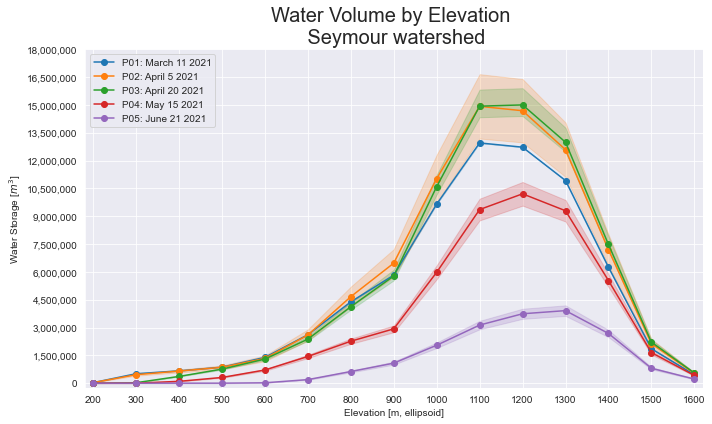

In [62]:
def watervol_elevation_plot(file_path, file, wshed, sub_basin, x_labels_dates, title,step, out_directory):
    os.chdir(file_path)
    df = pd.read_csv(file + ".csv")
    #graphs for elevation vs water volume
    sns.set_style("darkgrid")
    color_list = sns.color_palette()[:5]
    print(color_list)


    fig, ax = plt.subplots(figsize=(10,6))
    fig.set_tight_layout(True)
    #plt.subplots_adjust(top=.9,bottom=-.9)

    p01 = df[df["Phase"]==1]
    p02 = df[df["Phase"]==2]
    p03 = df[df["Phase"]==3]
    p04 = df[df["Phase"]==4]
    p05 = df[df["Phase"]==5]

    p1 = ax.plot(p01["zbin"], p01["water_vol"], "-o", color=color_list[0])
    p2 = ax.plot(p02["zbin"], p02["water_vol"], "-o", color=color_list[1])
    p3 = ax.plot(p03["zbin"], p03["water_vol"], "-o", color=color_list[2])
    p4 = ax.plot(p04["zbin"], p04["water_vol"], "-o", color=color_list[3])
    p5 = ax.plot(p05["zbin"], p05["water_vol"], "-o", color=color_list[4])


    ax.fill_between(p01["zbin"], p01["lower_wv"],p01["upper_wv"], alpha=0.2, color = color_list[0])
    ax.fill_between(p02["zbin"], p02["lower_wv"],p02["upper_wv"], alpha=0.2, color = color_list[1])
    ax.fill_between(p03["zbin"], p03["lower_wv"],p03["upper_wv"], alpha=0.2, color = color_list[2])
    ax.fill_between(p04["zbin"], p04["lower_wv"],p04["upper_wv"], alpha=0.2, color = color_list[3])
    ax.fill_between(p05["zbin"], p05["lower_wv"],p05["upper_wv"], alpha=0.2, color = color_list[4])

    ax.set_xlabel('Elevation [m, ellipsoid]')
    tick_spacing = 100
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    max_wv = (round(df["upper_wv"].max(),-2))
    scale = max_wv + step
    y_bottom = 0 - (step/6)

    ax.yaxis.set_ticks(np.arange(0, scale, step))
    ax.set_ylim(bottom=y_bottom)
    ax.set_xlim(left=p01["zbin"].min()-20,right=(p01["zbin"].max()+20))
    ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_yticklabels(["0","200,000","400,000","600,000", "800,000", "1,000,000", "1,200,000", "1,400,000", "1,600,000"])
    ax.set_ylabel('Water Storage [$m^{3}$]')
    ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 11 2021", "P02: April 5 2021", "P03: April 20 2021", "P04: May 15 2021", "P05: June 21 2021"], loc="upper left", fontsize = "medium")
    ax.set_title(title, fontsize = 20)


    os.chdir(out_directory)
    plt.savefig("WV_" + file + ".png")
    plt.show()

    
#Call functions    
Van_title = "Water Volume by Elevation \n Seymour watershed"
Van = watervol_elevation_plot(r"H:\Metro-Van\2021\Analysis\swe_tables\zbin","zbin_Seymour_all", "Metro-Van", "Seymour", Metro_dates, Van_title,1500000, r"H:\Metro-Van\2021\Analysis\figures\SWE_graphs")